In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn

Importamos el dataset:

In [2]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

Nos quedamos con las columnas que nos interesan:

In [3]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

Modificamos las columnas que tengan el caracter - y lo reemplazamos por el valor numérico NaN

In [4]:
dataset = dataset[important_cols].replace('-', np.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])

# Parte 1

## Ítem 1

### 1. Cálculo del intervalo de las variables

In [5]:
for score_col in score_cols:
    print(score_col,'[',dataset[score_col].min(),',',dataset[score_col].max(),']')

pf_identity_legal [ 0.0 , 10.0 ]
pf_identity_sex_male [ 0.0 , 10.0 ]
pf_identity_sex_female [ 0.0 , 10.0 ]
pf_identity_sex [ 0.0 , 10.0 ]
pf_identity_divorce [ 0.0 , 10.0 ]
pf_identity [ 0.0 , 10.0 ]
pf_score [ 2.22 , 9.56 ]
pf_rank [ 1.0 , 162.0 ]
ef_score [ 2.58 , 9.11 ]
ef_rank [ 1.0 , 162.0 ]
hf_score [ 3.69 , 9.12 ]
hf_rank [ 1.0 , 162.0 ]


### 2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana?

Las diferentes realizaciones de las vriables *pf_identity* y *hf_score* corresponden a diferentes años. Si nos quedamos con un solo valor por país estaríamos descartando datos valiosos, además de que el criterio que utilizarámos para decidir qué año utilizar sería siempre arbitrario. Utilizar la media o la mediana anual por país también enmascara la situación de cada país, ya sea que los indicadores estén mejorando o empeorando con los años. Por ello, para comparar países es mejor utilizar todos los años graficando las tendencias.

### 3. Media, mediana y desviación estandar de las variables *pf_identity* y *hf_score* en el mundo y Latino América y el Caribe

In [6]:
#generamos el dataset con los países de Latino Amércia y el Caribe
latam = dataset[dataset.region == 'Latin America & the Caribbean'] 

In [7]:
#Hacemos los cáluclos para la variable hf_score
mean = [latam.hf_score.mean(),dataset.hf_score.mean()]
median = [latam.hf_score.median(),dataset.hf_score.median()]
std = [latam.hf_score.std(),dataset.hf_score.std()]
print('hf_score:')
print('LatAm'+'\n'+'media: '+"{:.3f}".format(mean[0])+'\n'+'mediana: '+"{:.3f}".format(median[0])+
      '\n'+'Std.: '+"{:.3f}".format(std[0]))
print('Mundo'+'\n'+'media: '+"{:.3f}".format(mean[1])+'\n'+'mediana: '+"{:.3f}".format(median[1])+
      '\n'+'Std.: '+"{:.3f}".format(std[1]))  

hf_score:
LatAm
media: 7.037
mediana: 7.020
Std.: 0.635
Mundo
media: 6.978
mediana: 6.900
Std.: 1.056


In [8]:
#Hacemos los cáluclos para la variable pf_identity
mean = [latam.pf_identity.mean(),dataset.pf_identity.mean()]
median = [latam.pf_identity.median(),dataset.pf_identity.median()]
std = [latam.pf_identity.std(),dataset.pf_identity.std()]
print('pf_identity:')
print('LatAm'+'\n'+'media: '+"{:.3f}".format(mean[0])+'\n'+'mediana: '+"{:.3f}".format(median[0])+
      '\n'+'Std.: '+"{:.3f}".format(std[0]))
print('Mundo'+'\n'+'media: '+"{:.3f}".format(mean[1])+'\n'+'mediana: '+"{:.3f}".format(median[1])+
      '\n'+'Std.: '+"{:.3f}".format(std[1])) 

pf_identity:
LatAm
media: 8.582
mediana: 10.000
Std.: 1.876
Mundo
media: 7.281
mediana: 8.800
Std.: 3.182


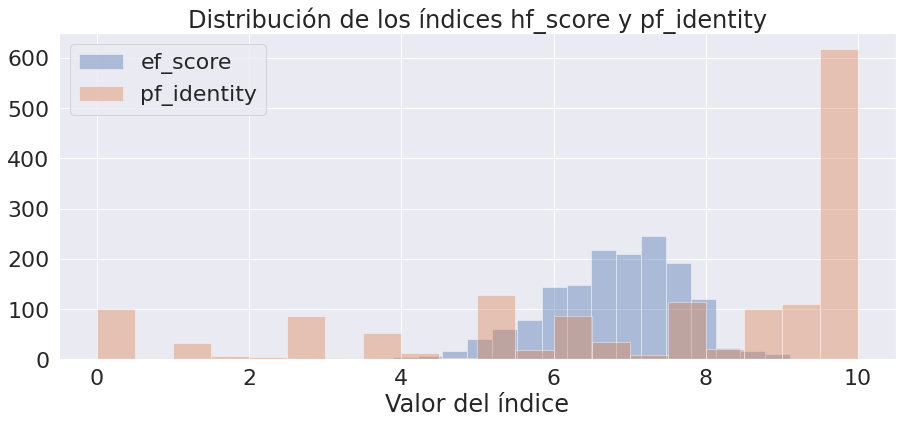

In [9]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.distplot(dataset.ef_score,bins=20, kde=False, label='ef_score')
seaborn.distplot(dataset.pf_identity,bins=20, kde=False, label='pf_identity')
plt.xlabel('Valor del índice')
plt.title('Distribución de los índices hf_score y pf_identity')
plt.legend()

### 4. ¿Tiene sentido calcular la moda?

La moda es el valor que más se repite. En particular para la variable *pf_identity* el valor que más se repite es 10.0. Si tomáramos la moda no estaríamos representando la situación de muchos otros países que se alejan más de dos desviaciones estándar de la media.

### 5. ¿Cómo se pueden sanear los valores faltantes?

Una posible solución es realizar regresiones lineales sobre los valores presentes para obtener los faltantes

### 6. Outliers

In [10]:
def outliers(dataset, column_name,n,m):
    interesting_col = dataset[column_name]
    #descarto los no outliers
    if m == 1:
        mask_salarios_outlier = (
            np.abs(interesting_col - interesting_col.mean()) >= (n * interesting_col.std()))
    #descarto los outliers
    else:
        mask_salarios_outlier = (
            np.abs(interesting_col - interesting_col.mean()) <= (n * interesting_col.std())) 
    return dataset[mask_salarios_outlier]

In [11]:
print(outliers(dataset, "hf_score",2.5,1).region)

137               Sub-Saharan Africa
141       Middle East & North Africa
157    Latin America & the Caribbean
159       Middle East & North Africa
232       Middle East & North Africa
303       Middle East & North Africa
319    Latin America & the Caribbean
321       Middle East & North Africa
465       Middle East & North Africa
481    Latin America & the Caribbean
483       Middle East & North Africa
627       Middle East & North Africa
789       Middle East & North Africa
Name: region, dtype: object


In [12]:
print(outliers(dataset, "pf_identity",2,1).region)

1       Middle East & North Africa
16                      South Asia
44      Middle East & North Africa
53              Sub-Saharan Africa
59              Sub-Saharan Africa
                   ...            
1494                    South Asia
1498                    South Asia
1499    Middle East & North Africa
1512    Middle East & North Africa
1519    Middle East & North Africa
Name: region, Length: 102, dtype: object


El método utilizado para detectar los outliers fue quedarnos con aquellos países que se encuentran 2.5 std de la media para *ef_score* y 2 std para *pf_identity*. Encontramos que en ambos casos hay outliers, si bien en el caso de *pf_identity* los valores están más dispersos por lo que hubo que refinar el parámetro. Para la variable *ef_score* los outliers corresponden a la región *Middle East & North Africa* en su mayoría, con algunos valores para *Latin America & the Caribbean*. En el caso de *pf_identity* vemos la misma agrupación en *Middle East & North Africa* a la que se suma *Sub-Saharan Africa* y *South Asia*. Los outliers no deberían ser removidos ya que en general expresan la situación de países con índices bajos, información necesaria para interpretar el mundo. 

## Ítem 2

### 1. Media de las variables *ef_score* y  *pf_identity*

Text(0.5, 1.0, 'Media anual de los índices hf_score y pf_identity')

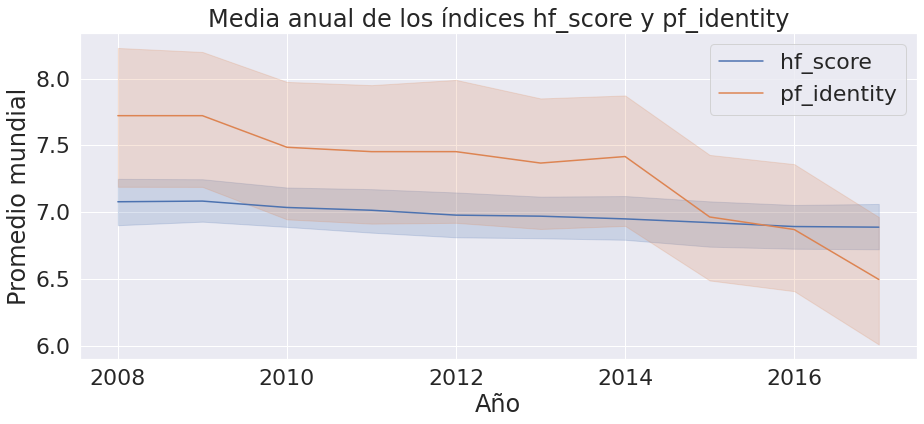

In [13]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.lineplot(data=dataset, x=dataset.year, y=dataset.hf_score, label='hf_score')
seaborn.lineplot(data=dataset, x=dataset.year, y=dataset.pf_identity,label='pf_identity')
plt.ylabel('Promedio mundial')
plt.xlabel('Año')
plt.title('Media anual de los índices hf_score y pf_identity')

### 2. Media de las variables *ef_score* y  *pf_identity* separados por región

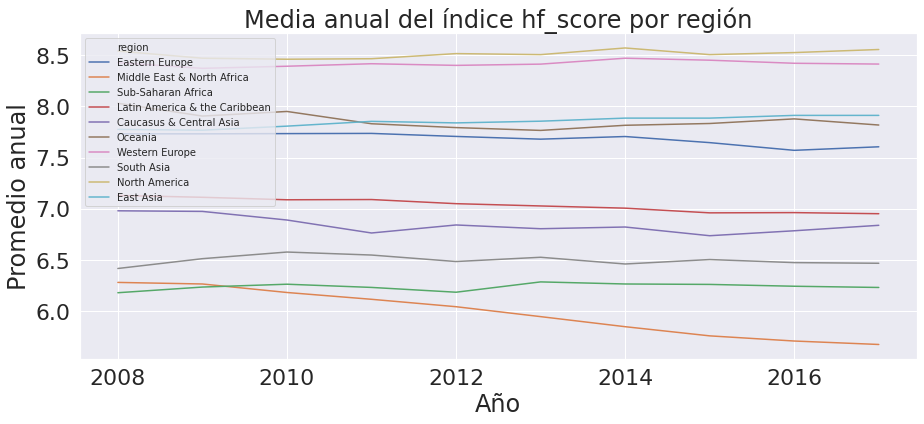

In [14]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.lineplot(data=dataset, x=dataset.year, y=dataset.hf_score, hue='region', ci=None, legend='brief')
plt.ylabel('Promedio anual')
plt.xlabel('Año')
plt.title('Media anual del índice hf_score por región')
plt.legend(fontsize='10',loc='upper left')

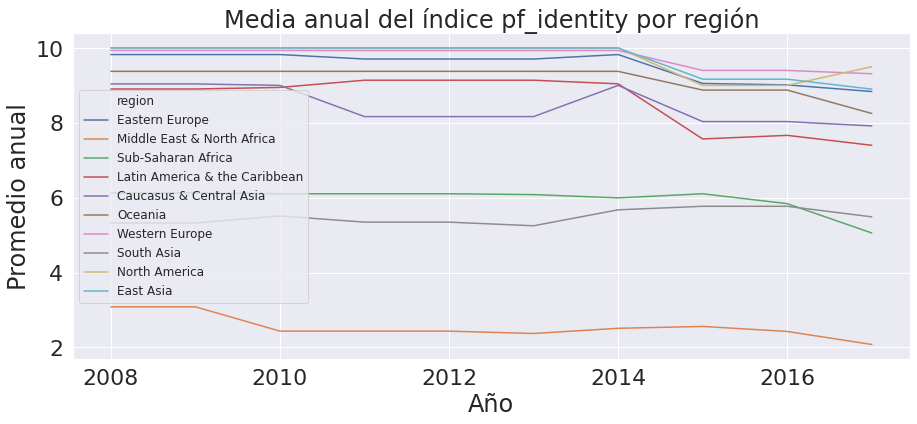

In [15]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.lineplot(data=dataset, x=dataset.year, y=dataset.pf_identity, hue='region', ci=None, legend='brief')
plt.ylabel('Promedio anual')
plt.xlabel('Año')
plt.title('Media anual del índice pf_identity por región')
plt.legend(fontsize='12',loc='best')

Se observa que ambas variables decaen con los años y que *pf_identity* decae más abruptamente. Dividir por regiones permite ver que las estas se agrupan en diferentes intervalos. Para el caso *ef_score*, son algunas regiones las que contribuyen a la disminución del índice, mientras que para *pf_identity* se detecta una caída para la mayoría.

### 3. Media de las variables *ef_score* y  *pf_identity* para Latino Amércia y Caribe

In [16]:
#Selecciono países al azar...
import random as nrd

codes = latam.ISO_code.unique()
nr = nrd.sample(set(codes),10)
latam2 = latam[latam.ISO_code.isin(nr)]

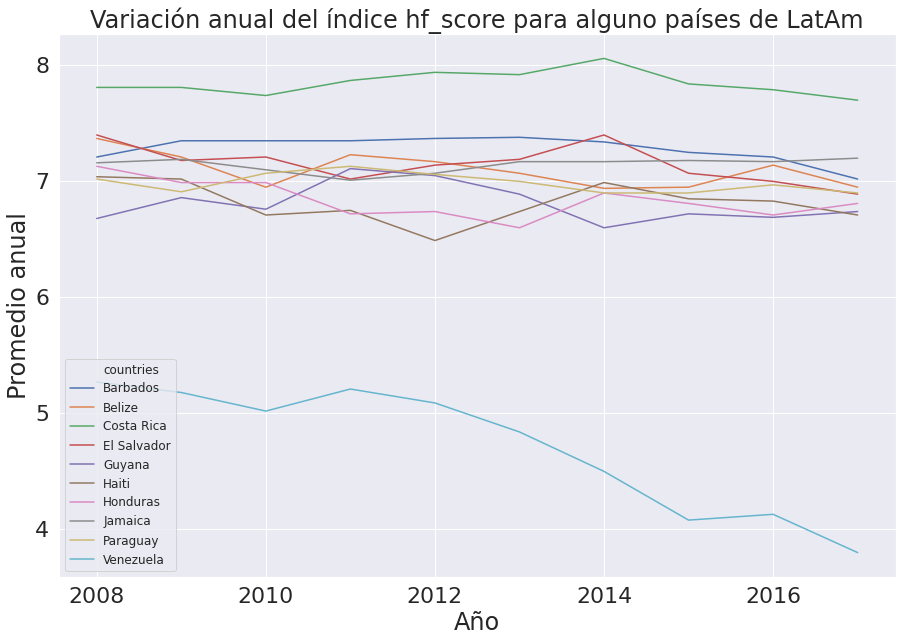

In [17]:
plt.figure(figsize=(15,10))
seaborn.set(font_scale = 2)
seaborn.lineplot(data=latam2, x=latam2.year, y=latam2.hf_score, hue='countries')
plt.ylabel('Promedio anual')
plt.xlabel('Año')
plt.title('Variación anual del índice hf_score para alguno países de LatAm')
plt.legend(fontsize='12',loc='best')

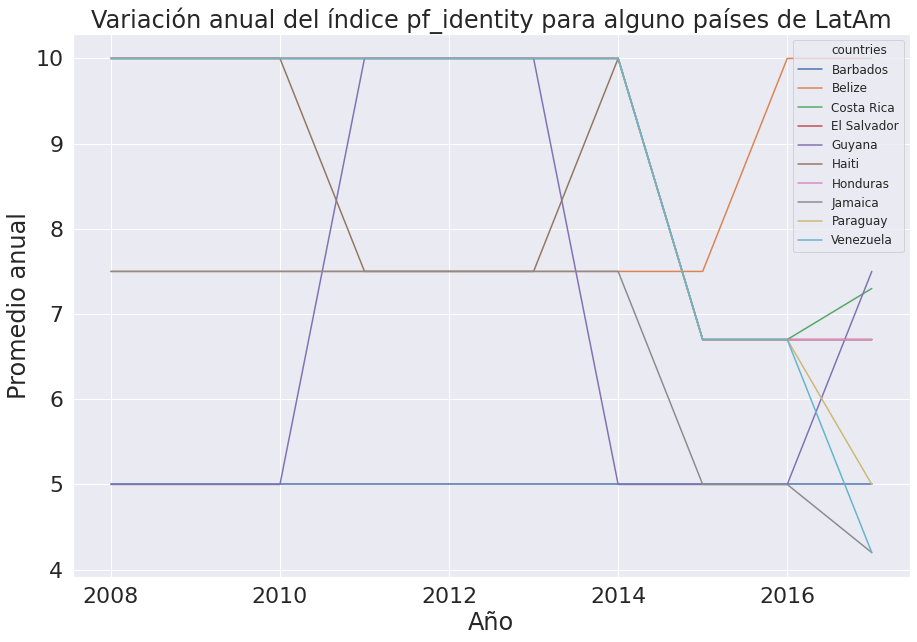

In [18]:
plt.figure(figsize=(15,10))
seaborn.set(font_scale = 2)
seaborn.lineplot(data=latam2, x=latam2.year, y=latam2.pf_identity, hue='countries')
plt.ylabel('Promedio anual')
plt.xlabel('Año')
plt.title('Variación anual del índice pf_identity para alguno países de LatAm')
plt.legend(fontsize='12',loc='best')

En esta muestra se observa que el índice *ef_score* se mantiene estable para la mayoría de los países y cae abruptamente para Venezuela. Para el caso de *pf_identity* la tendencia no es clara debido al comportamiento extraño de la variable en este grupo

## 3. Distribuciones

### 1. Distribución de *pf_identity* y *hf_score* para el mundo y Latino Amércia y el Caribe

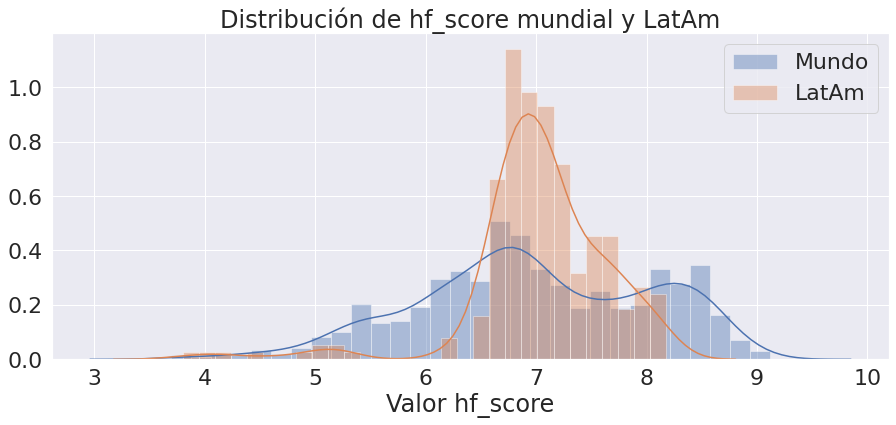

In [19]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.distplot(dataset.hf_score, bins=30,label='Mundo')
seaborn.distplot(latam.hf_score,  bins=30,label='LatAm')
plt.title('Distribución de hf_score mundial y LatAm')
plt.xlabel('Valor hf_score')
plt.legend()

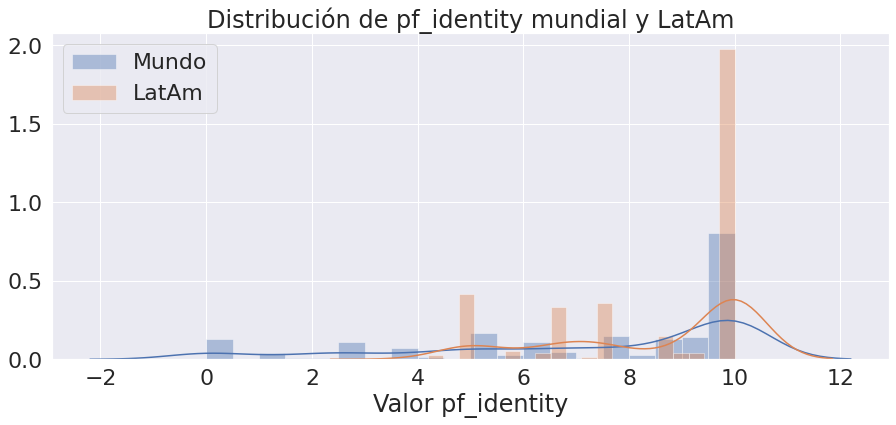

In [20]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.distplot(dataset.pf_identity, bins=20,label='Mundo')
seaborn.distplot(latam.pf_identity,  bins=20,label='LatAm')
plt.title('Distribución de pf_identity mundial y LatAm')
plt.xlabel('Valor pf_identity')
plt.legend()

In [21]:
hf_score_purged = outliers(dataset,'hf_score',2.5,2).hf_score
latam_purged = outliers(latam,'hf_score',2.5,2).hf_score

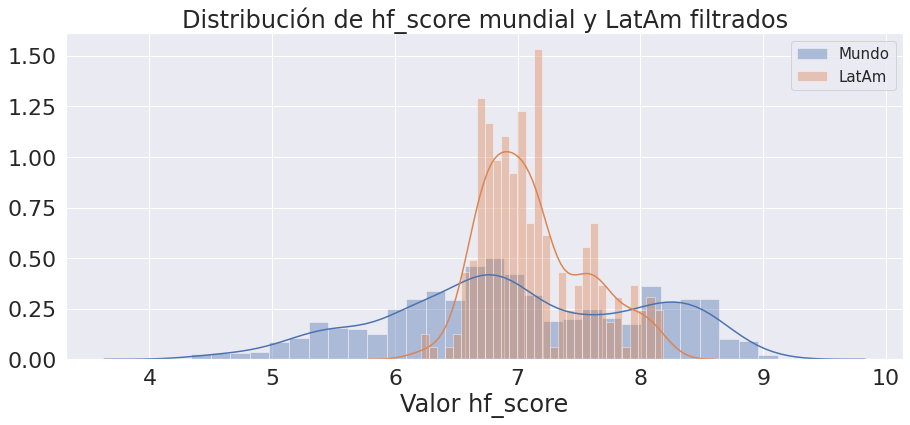

In [22]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.distplot(hf_score_purged, bins=30, label='Mundo')
seaborn.distplot(latam_purged,  bins=30, label='LatAm')
plt.title('Distribución de hf_score mundial y LatAm filtrados')
plt.xlabel('Valor hf_score')
plt.legend(fontsize='15')

In [23]:
pf_identity_purged = outliers(dataset,'pf_identity',2,2).pf_identity
latam_purged = outliers(latam,'pf_identity',2,2).pf_identity

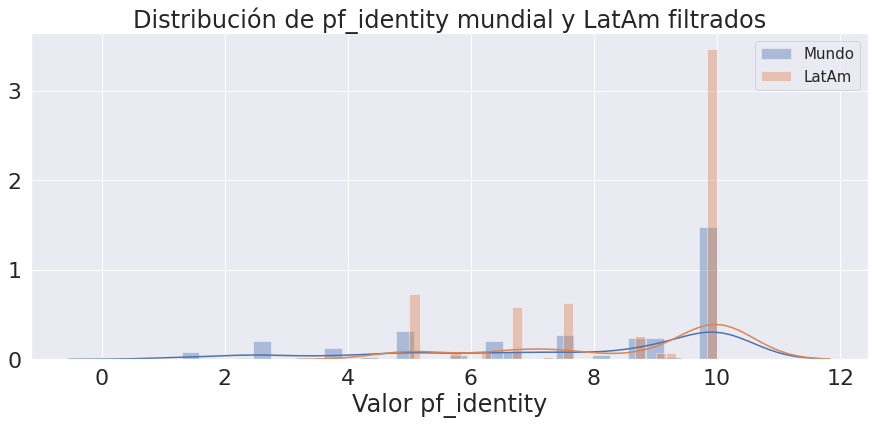

In [24]:
plt.figure(figsize=(15,6))
seaborn.set(font_scale = 2)
seaborn.distplot(pf_identity_purged, bins=30, label='Mundo')
seaborn.distplot(latam_purged,  bins=30, label='LatAm')
plt.title('Distribución de pf_identity mundial y LatAm filtrados')
plt.xlabel('Valor pf_identity')
plt.legend(fontsize='15')

Si eliminamos algunos outliers las distribuciones toman formas que se asemejan a algunas distribuciones... Tal vez normales o uniformes 

## 4. Correlaciones y Relaciones

### 1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

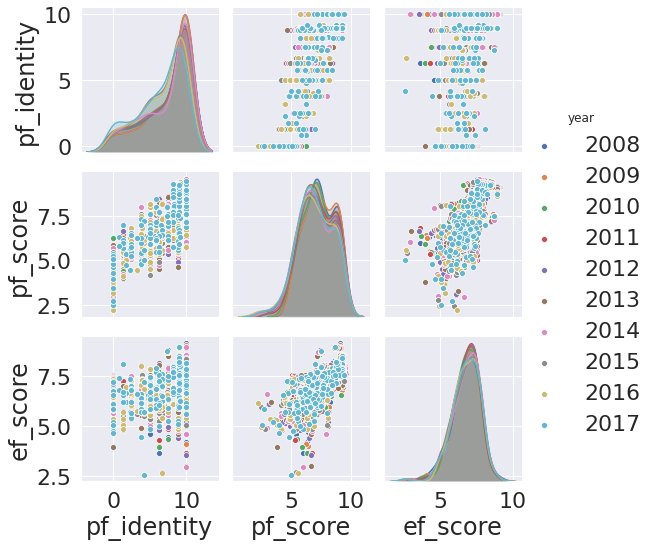

In [25]:
seaborn.pairplot(data=dataset, vars=['pf_identity','pf_score','ef_score'], hue='year')
#plt.title('Gráfico pairplot de las variables pf_identity,pf_score,ef_score')

Loas valores de *pf_identity* parecen estar discretizados, por lo que este gráfico no nos aporta gran información

### 2. Correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score.

Text(0.5, 1.0, 'Gráfico de correlación de las variables pf_identity y ef_score')

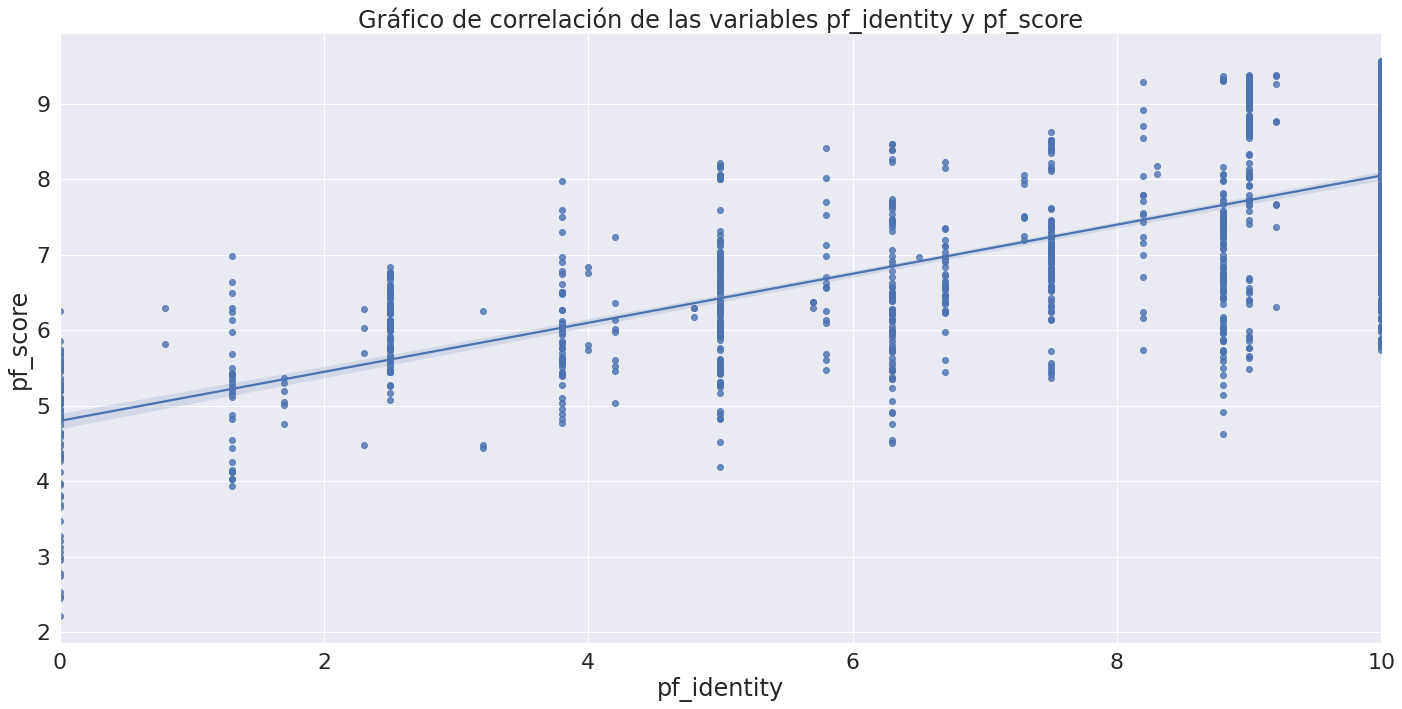

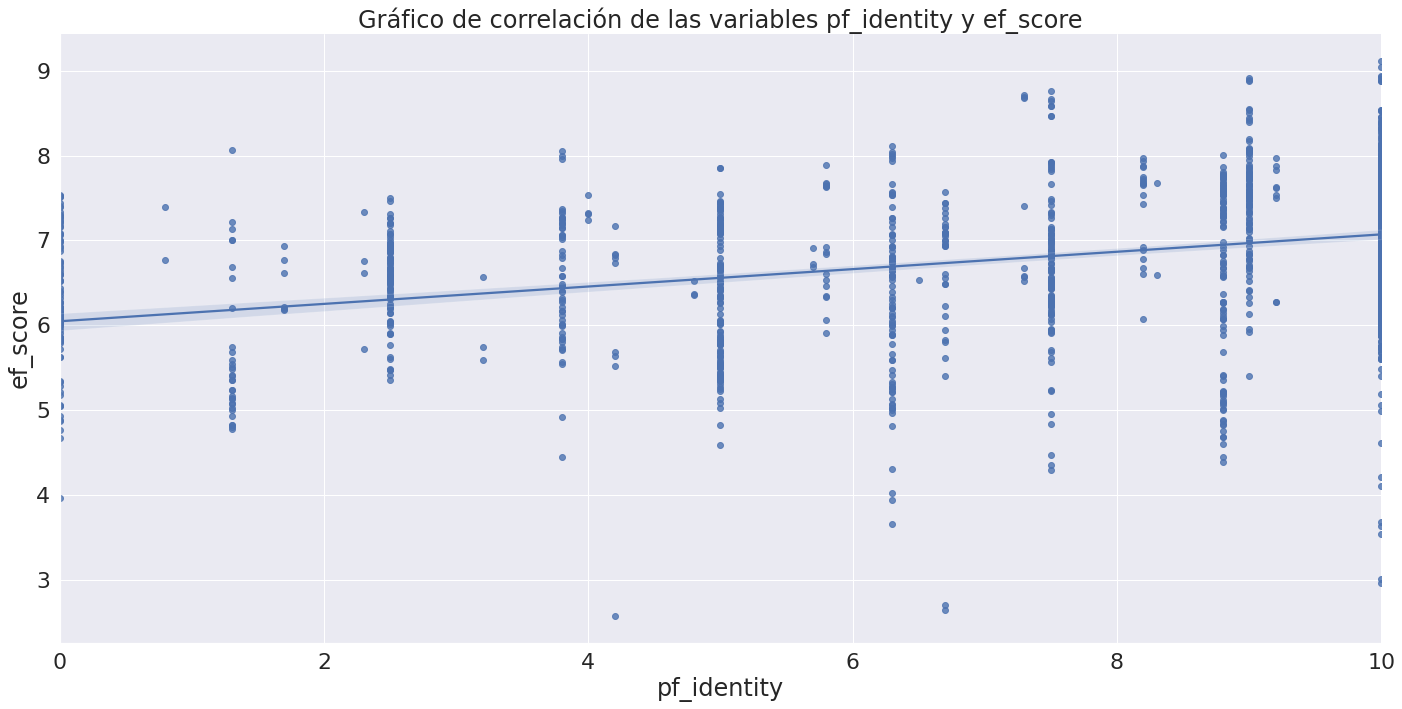

In [26]:
seaborn.lmplot(data=dataset,x='pf_identity',y='pf_score',height=10,aspect=2)
plt.title('Gráfico de correlación de las variables pf_identity y pf_score')
seaborn.lmplot(data=dataset,x='pf_identity',y='ef_score',height=10,aspect=2)
plt.title('Gráfico de correlación de las variables pf_identity y ef_score')

Existe una correlación positiva entre las variables *f_identity* y *pf_score*; y *pf_identity* y *ef_score*. En el caso *f_identity* y *pf_score* la correlación es mayor.

### 3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`

In [32]:
def categorical(dataset,column_name):
    data = dataset.sort_values(column_name)
    column = data[column_name].dropna()
    med = int(len(column)/2)
    median1 = np.median(column[:med])
    median2 = np.median(column)
    median3 = np.median(column[med:])
    intervals = [(column.min(),median1),(median1,median2),(median2,median3)]
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

In [33]:
pf_identity_segment = categorical(dataset,'pf_identity')
pf_score_segment = categorical(dataset,'pf_score')
ef_score_segment = categorical(dataset,'ef_score')

### 4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps)

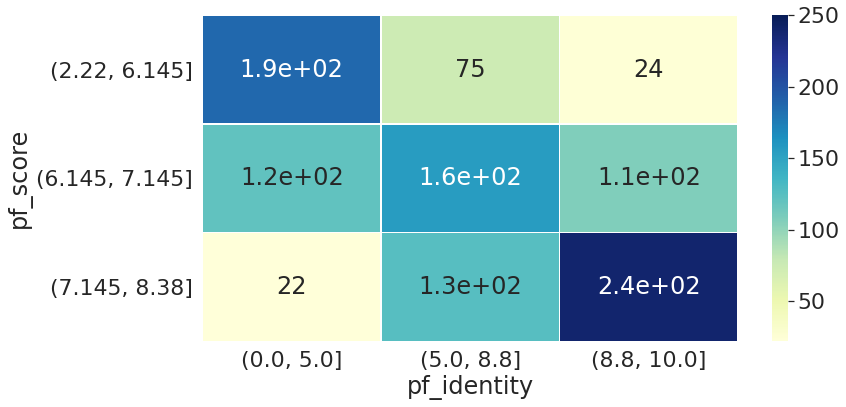

In [29]:
plt.figure(figsize=(12,6))
exp = pandas.crosstab(pf_score_segment, pf_identity_segment)
seaborn.heatmap(exp, annot=True,vmax=250,linewidths=.5, cmap="YlGnBu")

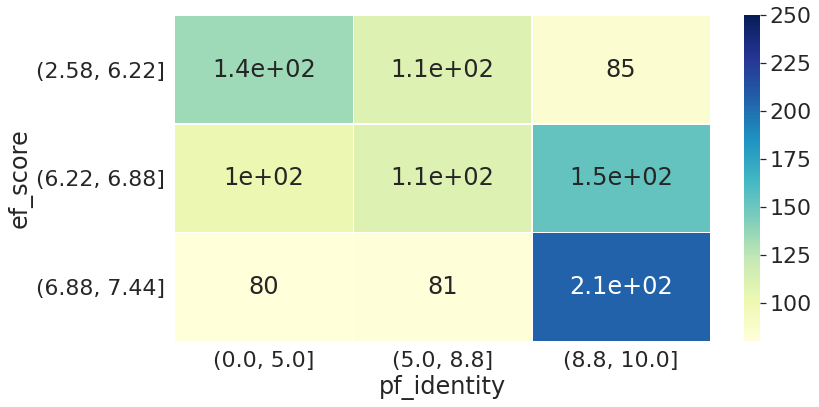

In [30]:
plt.figure(figsize=(12,6))
exp = pandas.crosstab(ef_score_segment, pf_identity_segment)
seaborn.heatmap(exp, annot=True,vmax=250,linewidths=.5, cmap="YlGnBu")

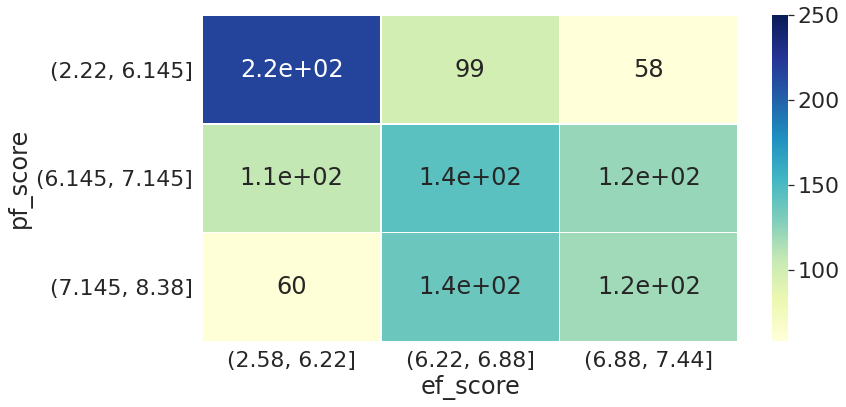

In [31]:
plt.figure(figsize=(12,6))
exp = pandas.crosstab(pf_score_segment, ef_score_segment)
seaborn.heatmap(exp, annot=True,vmax=250,linewidths=.5, cmap="YlGnBu")